# Preprocessing

In [1]:
import os
os.getcwd()

'C:\\Users\\tarof\\pump2\\code'

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read P&D data obtained from PumpOlymp website (premiereship)
df_original = pd.read_csv("pump_history_0831.csv", parse_dates=['date'],index_col = ['date'])
#see one example
df_original.iloc[42]

order                                    43
channel                  Bitcoin Pump Group
subscriber_0901                       32202
currency                                ICX
exchange                            Binance
duration                                 77
volume                                32.23
price before pump                   2.7e-05
max price                          2.78e-05
our buy price                      2.77e-05
our profit(%)                        0.0036
theoretical buy price              2.77e-05
theoretical profit(%)                0.0036
channel.1                              Show
Name: 2019-07-31 17:43:51, dtype: object

280
255


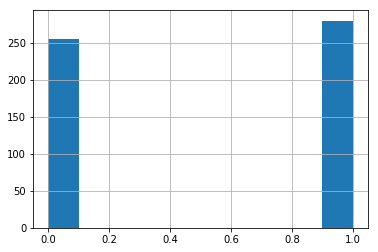

In [4]:
#label successful coin
#set threshold as 0.05 (5%)
df_successful = df_original[df_original["theoretical profit(%)"] > 0.05]
df_successful['success'] = 1
df_unsuccessful = df_original[df_original["theoretical profit(%)"] <= 0.05]
df_unsuccessful['success'] = 0
df = pd.concat([df_successful, df_unsuccessful])
df = df.sort_index()
print(len(df_successful))
print(len(df_unsuccessful))
df['success'].hist()

In [5]:
# keep original as exchange 2
df['exchange2'] = df['exchange']

In [6]:
#make exchange dummy variable
df = df.replace({'exchange': {'Yobit':1, 'Binance':0, "Bittrex": 0}})
#fill NaN with 0
df = df.fillna(0)

In [7]:
#import additional coin information
df_coin = pd.read_csv("coin_ranking_0902.csv")
df_coin.shape

(2349, 10)

In [8]:
#create new columns
df['ranked'] = 0
df['coin cap'] = 0
df['coin volume'] = 0
df['coin ranking'] = 0

In [9]:
#match the two data sheet with top 1264 coins
#add coin information 
for idx in range(0, df.shape[0]):
    for idx2 in range(0, 1265):
        if df['currency'].iloc[idx] == df_coin['Symbol'].iloc[idx2]:
            df['ranked'].iloc[idx] = 1
            df['coin cap'].iloc[idx] = float(df_coin['Market Cap'].iloc[idx2])
            df['coin ranking'].iloc[idx] = int(df_coin['Ranking'].iloc[idx2])
            df['coin volume'].iloc[idx] = float(df_coin['Volume (24h)'].iloc[idx2])

In [10]:
print(df.shape)
print(df[df['ranked']==1].shape)
print(df[df['ranked']==0].shape)

(535, 20)
(444, 20)
(91, 20)


note that 91 pumps are using coins on the rankings, but we assume that market cap and volume is very low for these coins; therefore assign 0 for each data

In [11]:
#get time
df['month']= df.index.month
df['weekday']= df.index.weekday
df['hour']= df.index.hour

time data in cordinates

In [12]:
#cyclical representation of time
def cordinate(df, col):
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / df[col].max())
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / df[col].max())
    return df

In [13]:
df = cordinate(df, 'hour')

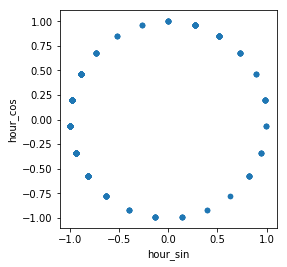

In [14]:
df.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

In [15]:
#to csv file
df.head()
df.to_csv("pnd_data.csv") 